<a href="https://colab.research.google.com/github/thangyou123/Visualize-TimeSeries-By-Merlion/blob/main/Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL AND VISUALIZE BY PROPHET 

In [ ]:
!pip install prophet
!pip install pandas
import pandas as pd
from prophet import Prophet

##Visualize Dữ liệu đầu vào

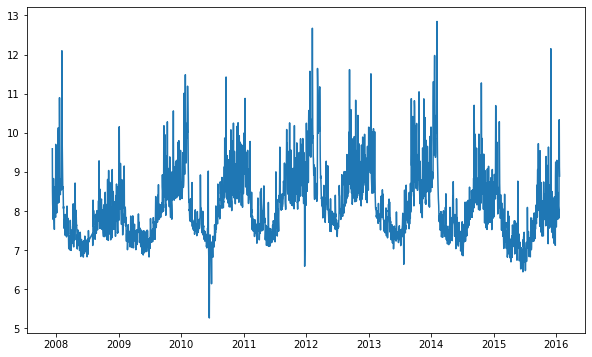

In [ ]:
url = "https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv"
df = pd.read_csv(url)
df.head()
import matplotlib.pyplot as plt

df["ds"] = pd.to_datetime(df["ds"])

fig = plt.figure(facecolor='w', figsize=(10, 6))
plt.plot(df.ds, df.y)

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203942,7.512521,8.915841
3266,2017-01-16,8.528933,7.774934,9.256375
3267,2017-01-17,8.316324,7.579312,9.060130
3268,2017-01-18,8.148937,7.391971,8.885318
3269,2017-01-19,8.160813,7.420666,8.818194


##Visualize  cho bài toán forecasting bằng thư viện prophet

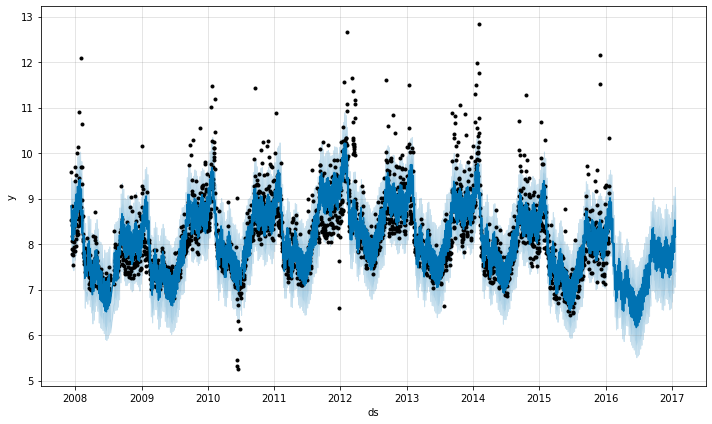

In [ ]:
fig1 = m.plot(forecast)

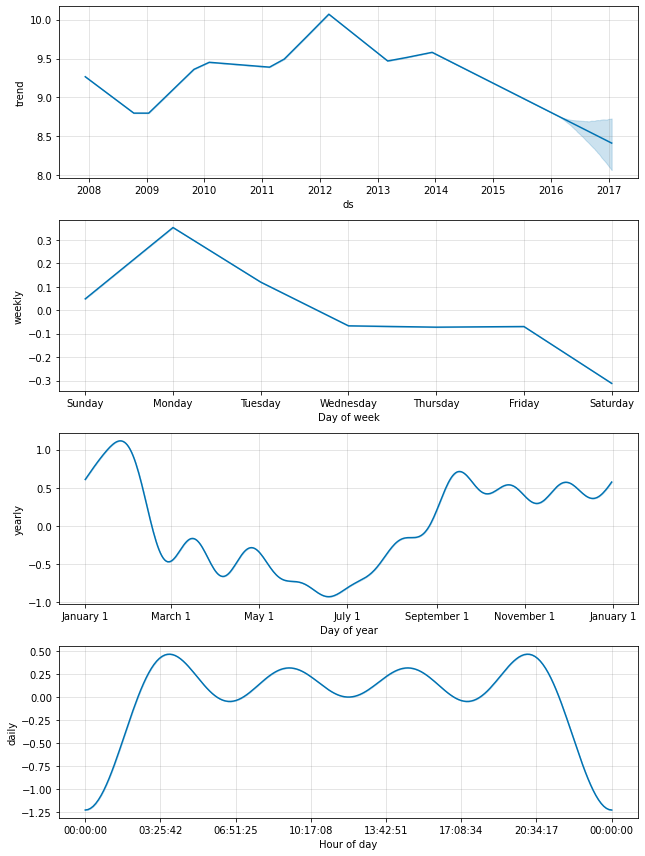

In [ ]:
plt2 = m.plot_components(forecast)

#INSTALL MERLION


In [ ]:
!git clone  https://github.com/salesforce/Merlion.git


In [ ]:
%cd Merlion
#cố định version của commit để đảm bảo code chạy ổn định
!git checkout  0a7c0b465507d084cb9320d0be5688e000846d16 
%cd ..

In [ ]:
!pip install Merlion/
%pip install Merlion/ts_datasets/
%pip install numpy
%pip install pandas

# ANOMALY BY MERLION



- plot_anom
- plot_anoms_plotly

- Figure
- MTSFigure

## Visualize cho tập dữ liệu ban đầu 

 **Upgrade thư viện plotly. Cần nhấn vào Restart Runtime nếu được yêu cầu để chạy tiếp các dòng bên  dưới**

In [ ]:
%pip install plotly --upgrade
import plotly
plotly.__version__

'5.4.0'

###Hỗ trợ visualize cho thư viện matplotlib (bằng method plot_anoms)

Time series /usr/local/lib/python3.7/data/nab/realKnownCause/ec2_request_latency_system_failure.csv (index 2) has timestamp duplicates. Kept first values.
Time series /usr/local/lib/python3.7/data/nab/realKnownCause/machine_temperature_system_failure.csv (index 3) has timestamp duplicates. Kept first values.


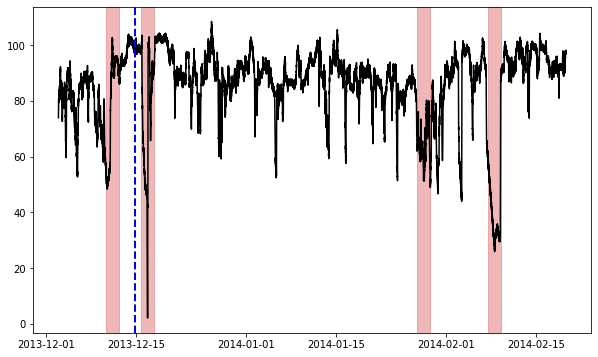

In [ ]:

import matplotlib.pyplot as plt



from merlion.plot import plot_anoms

from merlion.utils import TimeSeries
from ts_datasets.anomaly import NAB

np.random.seed(1234)

time_series, metadata = NAB(subset="realKnownCause")[3]

# Visualize dữ liệu time series
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(time_series,c='k')


ax.axvline(metadata[metadata.trainval].index[-1], ls="--", lw=2, c="b")
plot_anoms(ax, TimeSeries.from_pd(metadata.anomaly))


### Hoặc hỗ trợ visualize cho thư viện plotly (bằng method plot_anoms_plotly)

In [ ]:
from merlion.plot import plot_anoms_plotly
import plotly.express as px
fig=px.line(time_series,x=time_series.index,y='value')
fig.update_traces(line_color='black')
plot_anoms_plotly(fig,TimeSeries.from_pd(metadata.anomaly))
fig.add_vline(x=metadata[metadata.trainval].index[-1], line_width=2, line_dash="dash", line_color="blue")
fig.show()

## Visualize với model có sẵn của merlion

### Train model Merlion hỗ trợ 

In [ ]:
from merlion.utils import TimeSeries

# Get training split
train = time_series[metadata.trainval]
train_data = TimeSeries.from_pd(train)
train_labels = TimeSeries.from_pd(metadata[metadata.trainval].anomaly)

# Get testing split
test = time_series[~metadata.trainval]
test_data = TimeSeries.from_pd(test)
test_labels = TimeSeries.from_pd(metadata[~metadata.trainval].anomaly)
from merlion.models.defaults import DefaultDetectorConfig, DefaultDetector
model = DefaultDetector(DefaultDetectorConfig())
model.train(train_data=train_data)
test_pred = model.get_anomaly_label(time_series=test_data)

### Visualize cho  kết quả tập test (bằng  method plot_anomaly của model Merilon hỗ trợ)

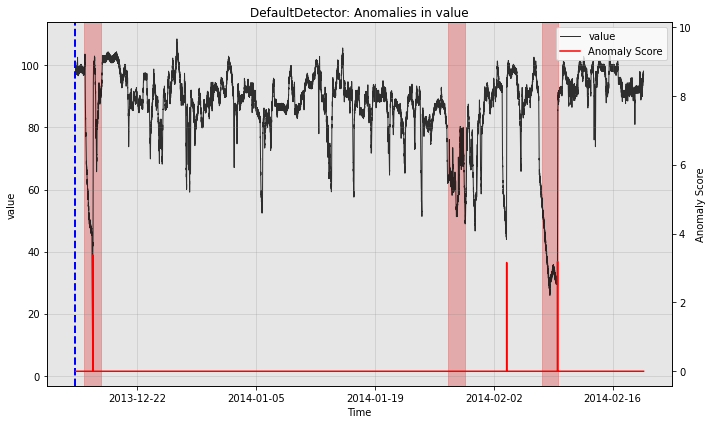

In [ ]:
fig, ax = model.plot_anomaly(
        time_series=test_data
        )# thể hiện các gạch màu đỏ cho điểm anomaly score dự đoán từ model
ax.axvline(metadata[metadata.trainval].index[-1], ls="--", lw=2, c="b")

plot_anoms(ax=ax, anomaly_labels=test_labels)
plt.show()

##Visualize cho model bên ngoài mà  merlion không hỗ trợ 

###Tạo data giả lập

In [ ]:
#Giả sử ta chạy một model mà merlion không hỗ trợ và được kết quả là một dataframe anomaly như sau
t1=test_data.univariates['value'].to_pd()
t2=test_pred.univariates['anom_score'].to_pd()
t1

2013-12-14 16:50:00    97.553922
2013-12-14 16:55:00    98.098957
2013-12-14 17:00:00    98.858194
2013-12-14 17:05:00    96.879666
2013-12-14 17:10:00    98.083988
                         ...    
2014-02-19 15:05:00    98.185415
2014-02-19 15:10:00    97.804168
2014-02-19 15:15:00    97.135468
2014-02-19 15:20:00    98.056852
2014-02-19 15:25:00    96.903861
Name: value, Length: 19280, dtype: float64

In [ ]:
t2

2013-12-14 16:50:00    0.0
2013-12-14 16:55:00    0.0
2013-12-14 17:00:00    0.0
2013-12-14 17:05:00    0.0
2013-12-14 17:10:00    0.0
                      ... 
2014-02-19 15:05:00    0.0
2014-02-19 15:10:00    0.0
2014-02-19 15:15:00    0.0
2014-02-19 15:20:00    0.0
2014-02-19 15:25:00    0.0
Freq: 5T, Name: anom_score, Length: 19280, dtype: float64

In [ ]:
#Sau đó ta chuyển đổi kiểu dữ liệu pandas ấy về dạng UnivariateTimeSeries và dùng method Figure để visualize cho dữ liệu
from merlion.utils import UnivariateTimeSeries

data=UnivariateTimeSeries(
    time_stamps=t1.index,  # timestamps in units of seconds
    values=t1,                         # time series values
  #  name="value"                             # optional: a name for this univariate
)
pred=UnivariateTimeSeries(
    time_stamps=t2.index,  # timestamps in units of seconds
    values=t2,                         # time series values
  #  name="anom_score"                             # optional: a name for this univariate
)

###Visualize với method Figure của Merlion 

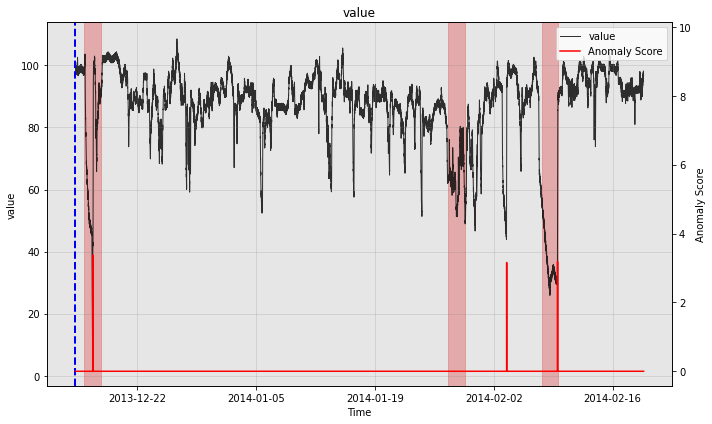

In [ ]:
from merlion.plot import Figure

fig,ax= Figure(data,anom=pred).plot()
ax.axvline(metadata[metadata.trainval].index[-1], ls="--", lw=2, c="b")
plot_anoms(ax=ax, anomaly_labels=test_labels)

##Visual cho tập data Đa biến

###Tạo data giả lập

In [ ]:
import random as random
d1=[]
d2=[]
d3=[]
d4=[]
for i in range(0,100):
  d1.append(random.randrange(1,33,1))
  d2.append(random.randrange(1,33,1))
  if d1[i] >20 and d2[i]>20:
    d4.append(True)
  else:
    d4.append(False)
  d3.append(i*20+1000000)
  from merlion.utils import UnivariateTimeSeries
from merlion.utils import TimeSeries
kpi = UnivariateTimeSeries(
    time_stamps=d3,  
    values=d1,                        
    name="feature1"                           
)

kpi2 = UnivariateTimeSeries(
    time_stamps=d3,  
    values=d2,                   
    name="feature2"   
)

kpi_label = UnivariateTimeSeries(
    time_stamps=d3, 
    values=d4                  

)


time_series_list = TimeSeries(univariates=[kpi.copy(),kpi2.copy(),kpi_label.copy()])

###Visualize với method MTSFigure

In [ ]:
from merlion.plot import MTSFigure
fig= MTSFigure(y=TimeSeries([kpi,kpi2]),anom=TimeSeries([kpi_label])).plot_plotly()
fig.update_yaxes(title_text="<b>value of feature</b> ", secondary_y=False)
fig.update_layout(
    title_text="MTSFigure method of Merlion"
)
fig.show()

#FORECASTING BY MERLION


- plot_forecast
- plot_forecast_plotly

- Figure
- MTSFigure

##import data and train model

100%|██████████| 414/414 [00:00<00:00, 518.68it/s]


Has missing data: False


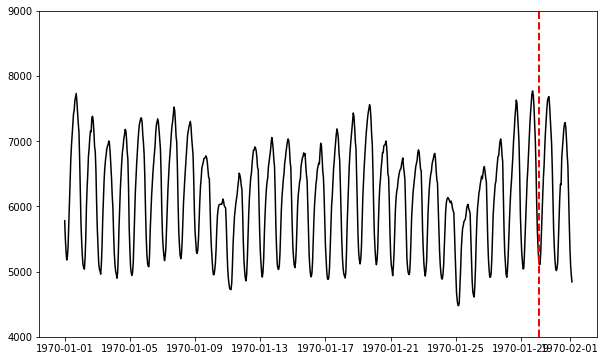

700 points in train split, 48 points in test split.


In [ ]:
from ts_datasets.forecast import M4
from merlion.models.forecast.arima import Arima, ArimaConfig
from merlion.models.forecast.prophet import Prophet, ProphetConfig
from merlion.models.forecast.smoother import MSES, MSESConfig
import matplotlib.pyplot as plt
from merlion.transform.base import Identity
from merlion.transform.resample import TemporalResample


from merlion.evaluate.forecast import ForecastMetric
from merlion.models.ensemble.combine import Mean, ModelSelector
from merlion.models.ensemble.forecast import ForecasterEnsemble, ForecasterEnsembleConfig

time_series, metadata = M4(subset="Hourly")[5]
trainval = metadata["trainval"]

timedeltas = np.diff(time_series.index)
print(f"Has missing data: {any(timedeltas != timedeltas[0])}")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(time_series,c="black")
ax.axvline(time_series[trainval].index[-1], ls="--", lw="2", c="red")
ax.set_ylim(4000,9000)
plt.show()

train_data = TimeSeries.from_pd(time_series[trainval])
test_data  = TimeSeries.from_pd(time_series[~trainval])
print(f"{len(train_data)} points in train split, "
      f"{len(test_data)} points in test split.")

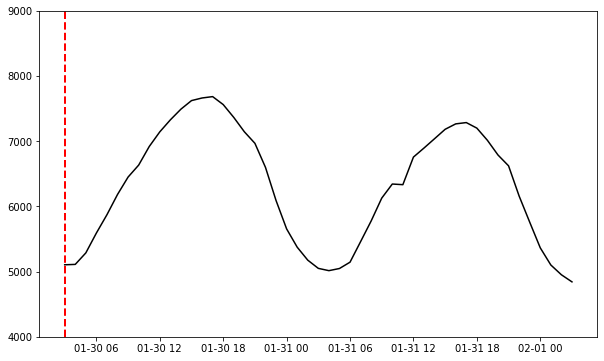

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(time_series[time_series[trainval].index[-1]:],c='black')
ax.axvline(time_series[trainval].index[-1], ls="--", lw="2", c="red")
ax.set_ylim(4000,9000)
plt.show()

In [ ]:
from merlion.models.defaults import DefaultForecasterConfig, DefaultForecaster
model = DefaultForecaster(DefaultForecasterConfig())
model.train(train_data=train_data)


##visualize cho model forecasting mà merlion hỗ trợ (bằng method .plot_forecast)

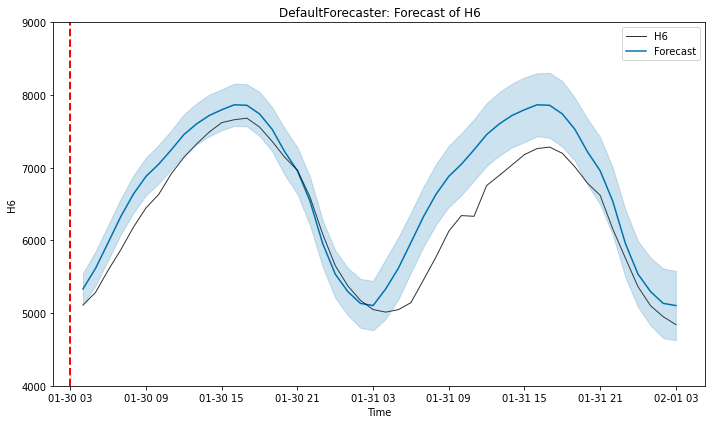

<Figure size 720x432 with 0 Axes>

In [ ]:
sub_test_data = test_data[:50]

fig, ax = model.plot_forecast(time_series=sub_test_data,
                               plot_forecast_uncertainty=True)

ax.axvline(time_series[trainval].index[-1], ls="--", lw="2", c="r")
ax.set_ylim(4000,9000)
ax.grid(False)
fig=plt.figure(figsize=(10, 6))
ax.set_facecolor('w')

##visualize cho model forecasting bên ngoài mà merlion không hỗ trợ (bằng method .Figure)

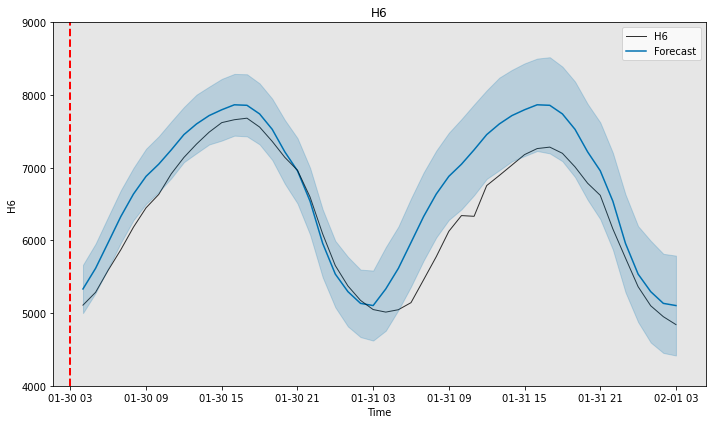

In [ ]:
from merlion.plot import Figure 
#giả lập ta có một tập data đã train với model bên ngoài. Ta chuyển về dạng univarites của merlion
time_stamps = sub_test_data.univariates[sub_test_data.names[0]].time_stamps
forecast1, stderr1 = model.forecast(time_stamps=time_stamps)
from merlion.utils import UnivariateTimeSeries
t=stderr1.univariates['H6_err'].to_pd()
t1=forecast1.univariates['H6'].to_pd()
t2=t1-t
t3=t1+t
t2=UnivariateTimeSeries(time_stamps=t2.index,values=t2.values)
t3=UnivariateTimeSeries(time_stamps=t3.index,values=t3.values)
#visualize data by Figure 
fig,ax=Figure(sub_test_data.univariates['H6'],yhat=forecast1.univariates['H6'],yhat_lb=t2,yhat_ub=t3).plot()
ax.axvline(time_series[trainval].index[-1], ls="--", lw="2", c="r")
ax.set_ylim(4000,9000)
ax.grid(False)